In [1]:
HEIGHT = 128
WIDTH = 128
EPOCHS = 8
BATCH_SIZE = 16
TRAIN_CSV = "D:/dataset/train/data_train.csv"

In [2]:
import numpy as np
import tensorflow as tf
from segmentation_models import Unet

%run utils/datasets.ipynb

%run utils/utils.ipynb

Segmentation Models: using `keras` framework.


In [3]:
partition, labels = load_train_csv(TRAIN_CSV)

In [4]:
print(len(partition['train']), len(partition['validation']))

7532 1884


In [5]:
training_generator = DataGenerator(list_IDs=partition['train'], labels=labels, batch_size=BATCH_SIZE,
                                   dim=(HEIGHT, WIDTH), n_channels=3, shuffle=True, pred=False)
validation_generator = DataGenerator(list_IDs=partition['validation'], labels=labels, batch_size=BATCH_SIZE,
                                     dim=(HEIGHT, WIDTH), n_channels=3, shuffle=True, pred=False)

In [6]:
model = Unet("resnet34", input_shape=(HEIGHT,WIDTH,3), encoder_weights="imagenet", encoder_freeze=False)

In [7]:
model.compile(optimizer=opt,
              loss=lambda y_true, y_pred : gen_depth_loss(y_true, y_pred, (1.0, 3.0, 0.1)),
              metrics=[depth_acc])

In [8]:
r = model.fit(training_generator, validation_data=validation_generator, epochs=EPOCHS)

Epoch 1/8
470/470 [==============================] - 833s 2s/step - loss: 0.7605 - depth_acc: 0.5767 - val_loss: 0.7984 - val_depth_acc: 0.8399
Epoch 2/8
470/470 [==============================] - 88s 187ms/step - loss: 0.6329 - depth_acc: 0.8596 - val_loss: 0.6289 - val_depth_acc: 0.8595
Epoch 3/8
470/470 [==============================] - 89s 189ms/step - loss: 0.6155 - depth_acc: 0.8657 - val_loss: 0.6112 - val_depth_acc: 0.8682
Epoch 4/8
470/470 [==============================] - 89s 187ms/step - loss: 0.6071 - depth_acc: 0.8697 - val_loss: 0.6065 - val_depth_acc: 0.8707
Epoch 5/8
470/470 [==============================] - 88s 186ms/step - loss: 0.6016 - depth_acc: 0.8725 - val_loss: 0.6008 - val_depth_acc: 0.8725
Epoch 6/8
470/470 [==============================] - 91s 192ms/step - loss: 0.5975 - depth_acc: 0.8743 - val_loss: 0.5980 - val_depth_acc: 0.8748
Epoch 7/8
470/470 [==============================] - 89s 190ms/step - loss: 0.5940 - depth_acc: 0.8760 - val_loss: 0.5966 - va

In [9]:
print(r.history)

{'loss': [0.7604545950889587, 0.6329184770584106, 0.6154987812042236, 0.6071428060531616, 0.6016134023666382, 0.597459077835083, 0.5940026640892029, 0.590679943561554], 'depth_acc': [0.5767449736595154, 0.8596317172050476, 0.8656937479972839, 0.8697200417518616, 0.8724867701530457, 0.8743418455123901, 0.8760085105895996, 0.8775448799133301], 'val_loss': [0.7984117269515991, 0.6289231181144714, 0.6111756563186646, 0.6065341830253601, 0.6008400917053223, 0.5979713797569275, 0.5965918898582458, 0.5946125984191895], 'val_depth_acc': [0.8398786187171936, 0.8594775199890137, 0.8682441115379333, 0.8706907629966736, 0.8725067377090454, 0.8747754693031311, 0.8754174709320068, 0.8733415603637695]}


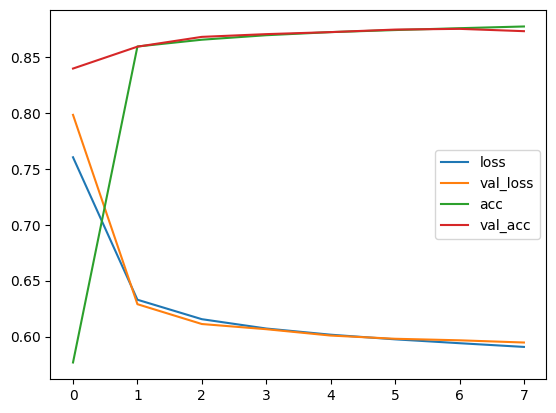

In [10]:
plot_history(r.history)

In [11]:
print(save_model('resnet_custom_dataset', model))

model_resnet_custom_dataset_1719522517.keras
